# Artificial Intelligence I: Introduction to Data Science and Machine Learning
# Chapter 4: Model Selection

In [1]:
# Uncomment below to install libraries
#!pip install -U scikit-learn numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
# Import built-in datasets
from sklearn import datasets

# ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# For reproducibility of same results
np.random.seed(1)

# plt.figure(figsize=(8, 6)) for all plots
plt.rcParams['figure.figsize'] = [8, 6]
# plt.grid('on') for all plots
plt.rcParams['axes.grid'] = True

## Train / test split
* Fit the model with train set
* Test the performance with test set
* This way we see that if model generalized enough to make predictions for any data
* Generalization is an important factor in machine learning

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# You can try this notebook with other datasets
# ex: load_wine(), load_breast_cancer()
#dataset = datasets.load_iris()
dataset = datasets.load_breast_cancer()

# Just features and targets
x = dataset['data']
y = dataset['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x.shape: (569, 30)
y.shape: (569,)
x_train.shape: (455, 30)
x_test.shape: (114, 30)
y_train.shape: (455,)
y_test.shape: (114,)


### Uncomment below to see the description of features

In [5]:
#print(dataset['DESCR'])

### Accuracy metric for classification
* see aslo: from sklearn.metrics import accuracy_score

In [6]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum() / len(y_true)

### Naive Bayes Classifier
* Applies Bayes theorem
* Naive: assumes features are independent
* Gaussian naive bayes: likelihood of the features is assumed to be Gaussian
* see: https://scikit-learn.org/stable/modules/naive_bayes.html

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
nb_classifier = GaussianNB()

nb_classifier.fit(x_train, y_train)

y_pred_train = nb_classifier.predict(x_train)
y_pred_test = nb_classifier.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 94.07%
Accuracy score (test): 94.74%


### Support Vector Machines (SVM)
* Maximizes the distance between different classes with support vectors 
* Kernel trick: mapping data to high dimentional space
* Common kernels: Linear, RBF, Polynomial (different degrees)
* see: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [9]:
# Support Vector Classifier (SVC) 
# See also Support Vector Regressor (SVR)
from sklearn.svm import SVC

In [10]:
# SVM with radial basis function kernel
sv_classifier = SVC(kernel='rbf')

sv_classifier.fit(x_train, y_train)

y_pred_train = sv_classifier.predict(x_train)
y_pred_test = sv_classifier.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 92.31%
Accuracy score (test): 90.35%


#### SVM Kernel Trick

In [11]:
# SVM with linear kernel
sv_classifier = SVC(kernel='linear')

sv_classifier.fit(x_train, y_train)

y_pred_train = sv_classifier.predict(x_train)
y_pred_test = sv_classifier.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 97.36%
Accuracy score (test): 95.61%


In [12]:
# SVM with polynomial kernel
sv_classifier = SVC(kernel='poly')

sv_classifier.fit(x_train, y_train)

y_pred_train = sv_classifier.predict(x_train)
y_pred_test = sv_classifier.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 91.65%
Accuracy score (test): 89.47%


### SVM visualization for different kernels
* From example: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py

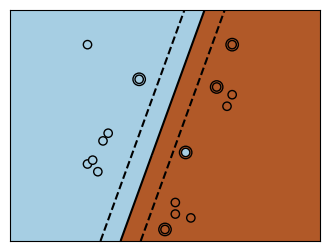

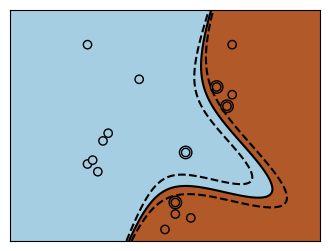

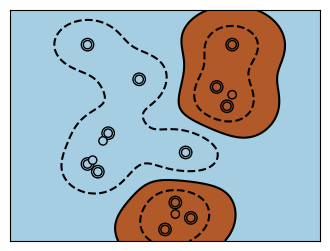

In [13]:
# Figure id
fignum = 1

# Dummy features
X = np.c_[
    (0.4, -0.7),
    (-1.5, -1),
    (-1.4, -0.9),
    (-1.3, -1.2),
    (-1.1, -0.2),
    (-1.2, -0.4),
    (-0.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    (1.3, 0.8),
    (1.2, 0.5),
    (0.2, -2),
    (0.5, -2.4),
    (0.2, -2.3),
    (0, -2.7),
    (1.3, 2.1),
].T

# Dummy targets
Y = [0, 0, 0, 0, 0, 0, 0, 0, 
     1, 1, 1, 1, 1, 1, 1, 1]

# Loop over different SVM kernels
for kernel in ('linear', 'poly', 'rbf'):
    clf = SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    
    # Plot the support vectors from SVM
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors='none',
        zorder=10,
        edgecolors='k',
    )
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=['k', 'k', 'k'],
        linestyles=['--', '-', '--'],
        levels=[-0.5, 0, 0.5],
    )

    # Limit x and y axis
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Remove ticks
    plt.xticks(())
    plt.yticks(())
    
    fignum = fignum + 1

### Decision Tree Classifier
* Uses tree like structure to make classification 
* Gini Index (or gini impurity): Choose splits in data 
* see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [14]:
# See also Decision Tree Regressor (DecisionTreeRegressor)
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(x_train, y_train)

y_pred_train = dt_classifier.predict(x_train)
y_pred_test = dt_classifier.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 100.0%
Accuracy score (test): 92.98%


### Decision Tree Visualization

In [16]:
from sklearn.tree import plot_tree

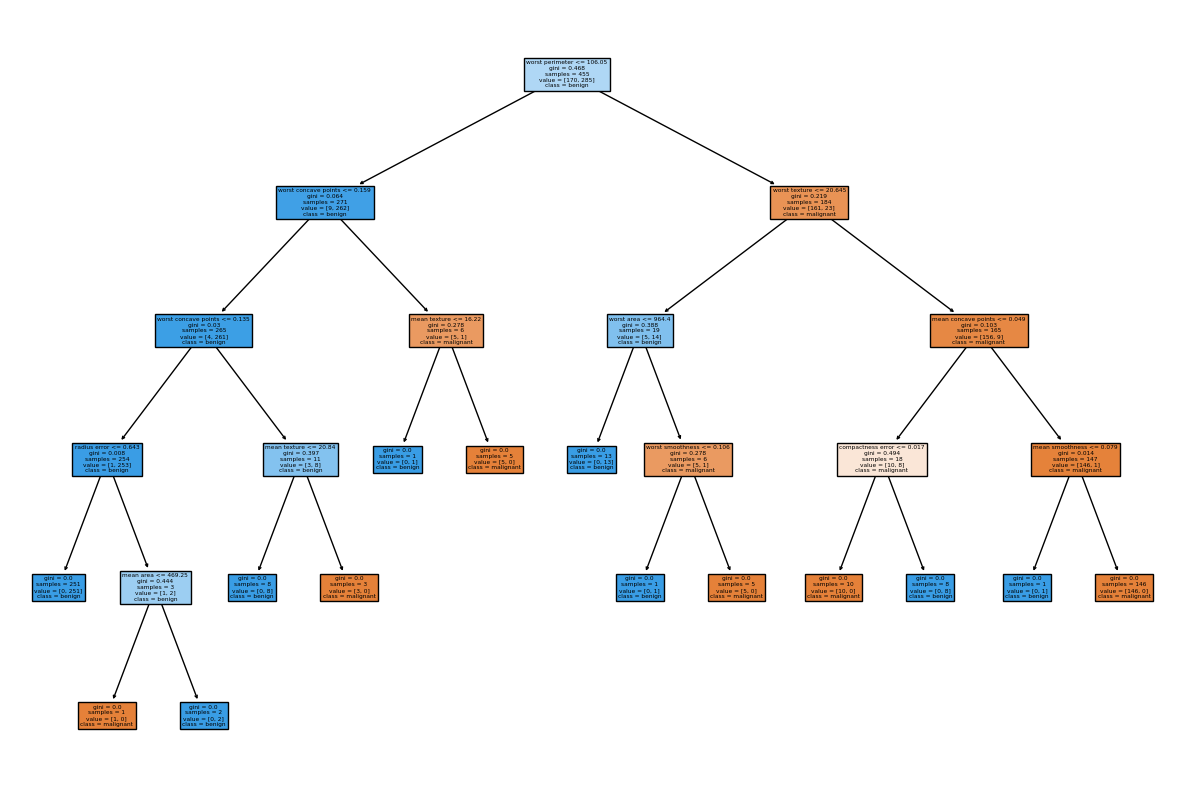

In [17]:
fig = plt.figure(figsize=(15, 10))

_ = plot_tree(
    dt_classifier, 
    feature_names=dataset.feature_names,  
    class_names=dataset.target_names,
    filled=True
)

### Random Forest Classifier
* Ensemble method (Bagging)
* Ensemble of decision tree classifiers
* Important parameter: n_estimators (determines how many decision trees are used)
* see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train, y_train)

y_pred_train = rf_classifier.predict(x_train)
y_pred_test = rf_classifier.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 100.0%
Accuracy score (test): 95.61%


In [20]:
rf_classifier = RandomForestClassifier(n_estimators=10)

rf_classifier.fit(x_train, y_train)

y_pred_train = rf_classifier.predict(x_train)
y_pred_test = rf_classifier.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 99.34%
Accuracy score (test): 95.61%


### Feature selection with Random Forest classifier
* RF can be used fo determine which features of the data is useful
* Alternative way for extracting features from dataset

In [21]:
rf_classifier.feature_importances_

array([0.00525524, 0.00156728, 0.00745257, 0.19048496, 0.00283801,
       0.00343224, 0.00513777, 0.08671003, 0.00408743, 0.00250666,
       0.00758757, 0.00651845, 0.00795026, 0.01057375, 0.00173752,
       0.00395785, 0.00091111, 0.00135967, 0.00301594, 0.00277499,
       0.03112228, 0.01788795, 0.33938235, 0.00640171, 0.02071399,
       0.01621208, 0.08763469, 0.10376654, 0.01314268, 0.00787645])

Text(0.5, 1.0, 'Feature Importances Decided by Random Forest Model')

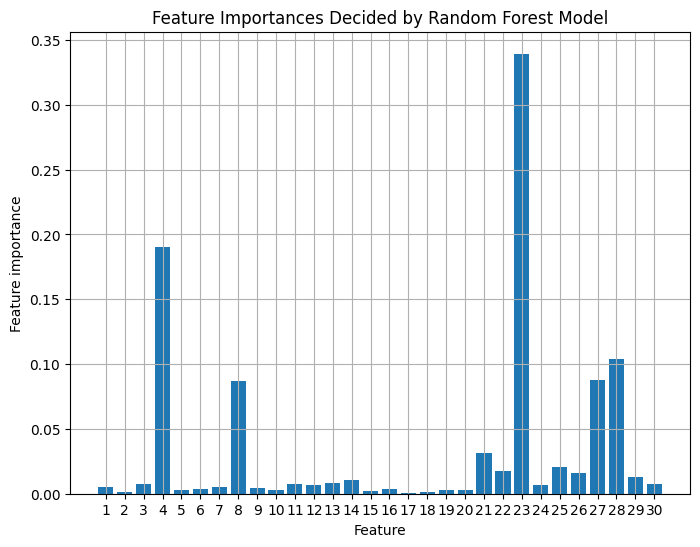

In [22]:
# Bar plot 
plt.bar(
    range(1, len(rf_classifier.feature_importances_)+1),
    rf_classifier.feature_importances_
)

plt.gca().set_xticks(list(range(1, len(rf_classifier.feature_importances_)+1))) # Force integer x-labels
plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.title('Feature Importances Decided by Random Forest Model')

### As you notice, sklearn has a uniform API, each model more or less use the same functions (fit, predict, etc.)
#### Let's make a list of models and loop over them for comparison

In [23]:
# List of tuples 
# Each: ('model name', model class)
all_models = [
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM (RBF kernel)', SVC(kernel='rbf')),
    ('SVM (Linear kernel)', SVC(kernel='linear')),   
    ('SVM (Polynomial kernel)', SVC(kernel='poly')),
    ('Random Forest (10 estimators)', RandomForestClassifier(n_estimators=10)),
    ('Random Forest (20 estimators)', RandomForestClassifier(n_estimators=20)),
    ('Random Forest (100 estimators)', RandomForestClassifier(n_estimators=100)),
    ('Random Forest (150 estimators)', RandomForestClassifier(n_estimators=150)),
]

In [24]:
best_test_score = 0.0
best_model_name = ''

for name, model in all_models:
    print(f'Model: {name}')
    
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    acc_score_train = accuracy(y_train, y_pred_train)
    acc_score_test = accuracy(y_test, y_pred_test)

    print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
    print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')
    
    if acc_score_test >= best_test_score:
        best_test_score = acc_score_test
        best_model_name = name
    
    print('#'*35)

Model: Naive Bayes
Accuracy score (train): 94.07%
Accuracy score (test): 94.74%
###################################
Model: Decision Tree
Accuracy score (train): 100.0%
Accuracy score (test): 95.61%
###################################
Model: SVM (RBF kernel)
Accuracy score (train): 92.31%
Accuracy score (test): 90.35%
###################################
Model: SVM (Linear kernel)
Accuracy score (train): 97.36%
Accuracy score (test): 95.61%
###################################
Model: SVM (Polynomial kernel)
Accuracy score (train): 91.65%
Accuracy score (test): 89.47%
###################################
Model: Random Forest (10 estimators)
Accuracy score (train): 99.78%
Accuracy score (test): 94.74%
###################################
Model: Random Forest (20 estimators)
Accuracy score (train): 99.78%
Accuracy score (test): 94.74%
###################################
Model: Random Forest (100 estimators)
Accuracy score (train): 100.0%
Accuracy score (test): 95.61%
##########################

## Show the Best Model with Accuracy
* **NOTE:** Usually Random Forest gets the best results. Here however, we are using very simple dataset so any model can be the best

In [25]:
print(f'Best model: {best_model_name}, test accuracy score: {best_test_score*100.0:.4}%')

Best model: Random Forest (100 estimators), test accuracy score: 95.61%


## Grid search
* Search the best parameters for a model
* Note: this can take some time (processor intensive)
* see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [26]:
from sklearn.model_selection import GridSearchCV

### Support vector classifier: choose best kernel

In [27]:
search_parameters = {
    'kernel': ('linear', 'rbf', 'poly'),
    'degree': range(2, 5) # Only for polynomial kernel
}

In [28]:
sv_classifier = SVC()

# For all scores: sorted(sklearn.metrics.SCORERS.keys())
grid = GridSearchCV(
    sv_classifier, 
    search_parameters,
    scoring='accuracy',
    n_jobs=-1, # Use all available processor cores
)

grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'degree': range(2, 5),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy')

### Best parameters

In [29]:
grid.best_params_

{'degree': 2, 'kernel': 'linear'}

### Best model

In [30]:
best_sv_model = grid.best_estimator_
best_sv_model

SVC(degree=2, kernel='linear')

In [31]:
y_pred_train = best_sv_model.predict(x_train)
y_pred_test = best_sv_model.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 97.36%
Accuracy score (test): 95.61%


### Random forest classifier: choose best n_estimators

In [32]:
search_parameters = {
    'n_estimators': range(2, 150),
}

In [33]:
rf_classifier = RandomForestClassifier()

# For all scores: sorted(sklearn.metrics.SCORERS.keys())
grid = GridSearchCV(
    rf_classifier, 
    search_parameters,
    scoring='accuracy',
    n_jobs=-1, # Use all available processor cores
)

grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(2, 150)}, scoring='accuracy')

In [34]:
# Best parameters
grid.best_params_

{'n_estimators': 28}

In [35]:
# Get the best model
best_rf_model = grid.best_estimator_
best_rf_model

RandomForestClassifier(n_estimators=28)

In [36]:
y_pred_train = best_rf_model.predict(x_train)
y_pred_test = best_rf_model.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 100.0%
Accuracy score (test): 93.86%


## Breast Cancer dataset (Binary classification)

In [37]:
dataset = datasets.load_breast_cancer()

# Just features and targets
x = dataset['data']
y = dataset['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x.shape: (569, 30)
y.shape: (569,)
x_train.shape: (455, 30)
x_test.shape: (114, 30)
y_train.shape: (455,)
y_test.shape: (114,)


### Uncomment below to see the description of features

In [38]:
#print(dataset['DESCR'])

### Train a classifier on data

In [39]:
sv_classifier = SVC()
sv_classifier.fit(x_train, y_train)

y_pred_train = sv_classifier.predict(x_train)
y_pred_test = sv_classifier.predict(x_test)

acc_score_train = accuracy(y_train, y_pred_train)
acc_score_test = accuracy(y_test, y_pred_test)

print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

Accuracy score (train): 92.09%
Accuracy score (test): 89.47%


# Classification Metrics
## Confusion Matrix
* Summary of prediction results
* Most useful for binary classification
* Useful for determining TP, TN, FP, FN
* TP: True positive (true: 1, predicted: 1)
* TN: True negative (true: 0, predicted: 0)
* FP: False positive (true: 0, predicted: 1)
* FN: False negative (true: 1, predicted: 0)

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = [10, 6]

plt.rcParams['axes.grid'] = False

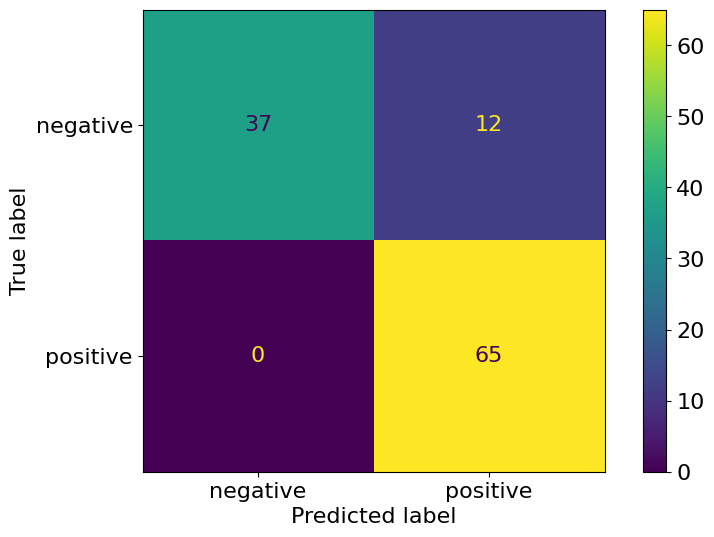

In [41]:
display_labels = ['negative', 'positive']
#display_labels = ['malignant', 'bening']
#display_labels = ['malignant', 'non-malignant']
# malignant -> cancerous
# bening -> non-cancerous
#display_labels = dataset['target_names']

plt.rcParams.update({'font.size': 16}) # Increase font size

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=display_labels)

## Classification Report
* Accuracy: How often is the classifier correct (overall)

$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$

* Precision: how often is it correct when predicting positives

$$
Precision = \frac{TP}{TP+FP}
$$

* Recall: how often does it predict positive from all the positive classes

$$
Recall = Sensitivity = \frac{TP}{TP+FN}
$$

* $F_\beta$ score: harmonic mean of precision and recall
* $\beta$ is commonly 0.5, 1, or 2 (like F1)

$$
F_\beta = \frac{(1+\beta^2)*Precision*Recall}{\beta^2*Precision+Recall}
$$

$$
F1 = \frac{2*Precision*Recall}{Precision+Recall}
$$

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        49
           1       0.84      1.00      0.92        65

    accuracy                           0.89       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.89      0.89       114



## ROC (Receiver operating characteristic) Curve
* Useful graph for binary classifiers
* AUC (area under curve): better classifier when area under is maximized

In [43]:
from sklearn.metrics import RocCurveDisplay

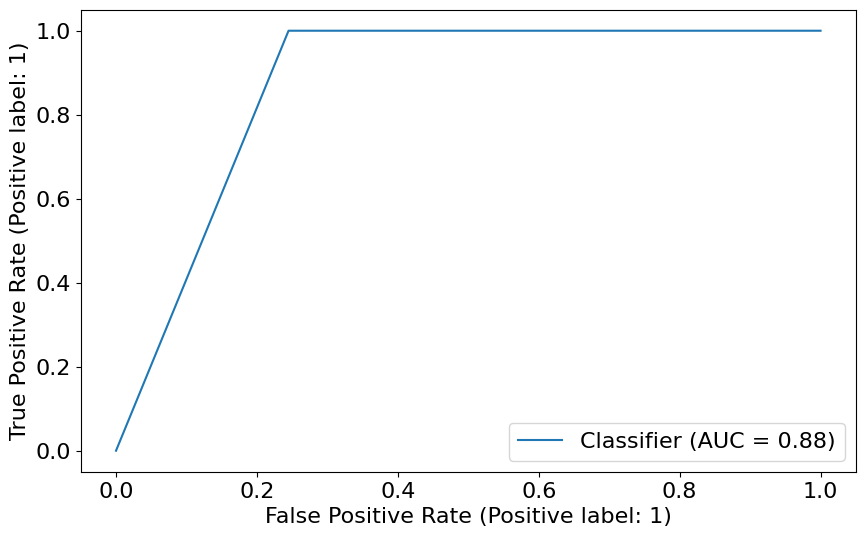

In [44]:
RocCurveDisplay.from_predictions(y_test, y_pred_test)

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
# Area under the graph (higher is better)
roc_auc_score(y_test, y_pred_test)

0.8775510204081632

## Class Imbalance

In [47]:
breast_cancer_ds = datasets.load_breast_cancer()

df_breast_cancer = pd.DataFrame(data=breast_cancer_ds['data'], columns=breast_cancer_ds['feature_names'])
df_breast_cancer['target'] = breast_cancer_ds['target']

df_breast_cancer.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

### Imbalanced learning

In [48]:
sv_classifier = SVC(random_state=1)
sv_classifier.fit(x_train, y_train)

y_pred_train = sv_classifier.predict(x_train)
y_pred_test = sv_classifier.predict(x_test)

#acc_score_train = accuracy(y_train, y_pred_train)
#acc_score_test = accuracy(y_test, y_pred_test)

#print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
#print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        49
           1       0.84      1.00      0.92        65

    accuracy                           0.89       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.89      0.89       114



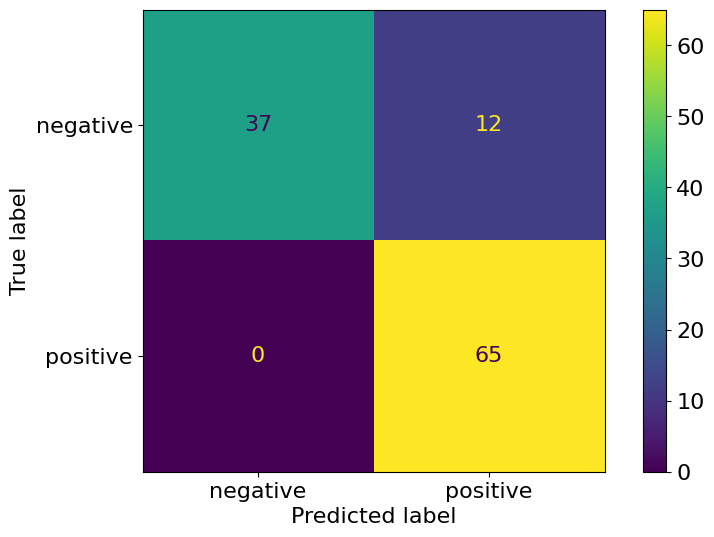

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=display_labels)

### Add class weights to balance out the classes
* Loss will be higher for higher weighted classes

In [50]:
# Keys: Class ids
# Values: Class weights
class_weight_dict = {
    0: 1.5, # Since we have fewer, class weight is higher
    1: 1.0
}

In [51]:
sv_classifier = SVC(class_weight=class_weight_dict)
sv_classifier.fit(x_train, y_train)

y_pred_train = sv_classifier.predict(x_train)
y_pred_test = sv_classifier.predict(x_test)

#acc_score_train = accuracy(y_train, y_pred_train)
#acc_score_test = accuracy(y_test, y_pred_test)

#print(f'Accuracy score (train): {acc_score_train*100.0:.4}%')
#print(f'Accuracy score (test): {acc_score_test*100.0:.4}%')

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        49
           1       0.86      0.97      0.91        65

    accuracy                           0.89       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



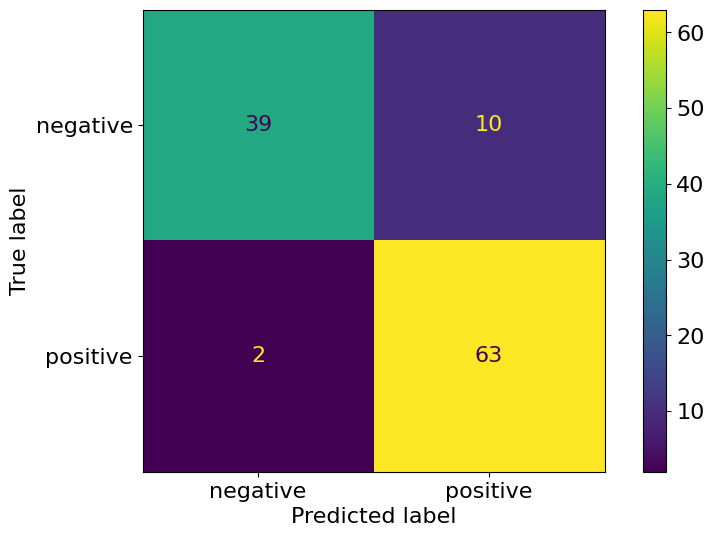

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=display_labels)

## Oversampling
* SMOTE (Synthetic Minority Oversampling Technique)
* install and use imbalanced-learn (https://imbalanced-learn.org/stable/index.html)

In [53]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(k_neighbors=5, random_state=42)

In [55]:
x_oversampled, y_oversampled = smote.fit_resample(x, y)

In [56]:
df_breast_cancer_oversampled = pd.DataFrame(data=x_oversampled, columns=breast_cancer_ds['feature_names'])
df_breast_cancer_oversampled['target'] = y_oversampled

### Now we have equal samples of target

In [57]:
df_breast_cancer_oversampled.target.value_counts()

target
0    357
1    357
Name: count, dtype: int64

### Fit with Oversampled

In [58]:
x_oversampled = df_breast_cancer_oversampled.drop('target', axis=1)
y_oversampled = df_breast_cancer_oversampled['target']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, test_size=0.20)

sv_classifier = SVC()
sv_classifier.fit(x_train, y_train)

y_pred_train = sv_classifier.predict(x_train)
y_pred_test = sv_classifier.predict(x_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        74
           1       0.83      0.93      0.88        69

    accuracy                           0.87       143
   macro avg       0.88      0.88      0.87       143
weighted avg       0.88      0.87      0.87       143



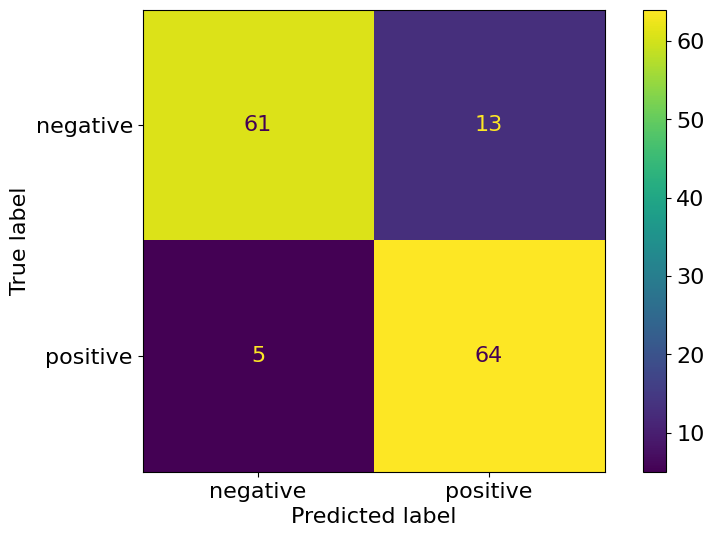

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=display_labels)

### In general the pipeline of machine learning is:
* Find a suitable dataset or collect same data
* Make sure that data is clean and has relevant features for your problem
* Make sure that classes are balanced (classification)
* Preprocess data
* Train and test a model for best performance
* For maximazing performance, select the best parameters and model
* Test the model
* Make sure model is generalized enough to make predictions outside training dataset
* Deploy the model as a service and make some predictions

## Check out all other examples: 
* https://scikit-learn.org/stable/auto_examples/index.html

## And API referance
* https://scikit-learn.org/stable/modules/classes.html